In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-200')

#Задание 1

In [ ]:
from pandas import read_csv
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [ ]:
filename='pima-indians-diabetes.data.csv'
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
data=read_csv(filename,names=names)
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1
5,5,116,74,0,0,25.6,0.20,30,0
6,3,78,50,32,88,31.0,0.25,26,1
7,10,115,0,0,0,35.3,0.13,29,0
8,2,197,70,45,543,30.5,0.16,53,1
9,8,125,96,0,0,0.0,0.23,54,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.groupby('class').size() # size подсчитывает сколько строк для каждого класса

class
0    500
1    268
dtype: int64

In [ ]:
data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [ ]:
set_option('display.width',100) # задается ширина экрана с выводом
set_option('precision',2)       # задается количество знаков после запятой

In [ ]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [ ]:
# корреляция штоли
# Пирсона - для нормального распределеня
# Спирмана - для ненормального распределеня
# Кэндала - для ненормального распределеня

In [ ]:
data.skew()
# если показатель ассиметрии находится в пределах std отклонения, то
# считаем, что распределение нормальное

preg     0.90
plas     0.17
pres    -1.84
skin     0.11
test     2.27
mass    -0.43
pedi     1.92
age      1.13
class    0.64
dtype: float64

In [ ]:
data.kurtosis()
# тоже сравниваем со std отклонением, если в его пределах, то
# распределение нормальное

preg     0.16
plas     0.64
pres     5.18
skin    -0.52
test     7.21
mass     3.29
pedi     5.59
age      0.64
class   -1.60
dtype: float64

In [ ]:
data.corr(method='pearson') # коэффициент корреляции Пирсона

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
plas,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
pres,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
skin,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
test,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
mass,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
pedi,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
class,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [ ]:
data.corr(method='spearman') # коэффициент корреляции Пирсона

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.00e+00,0.13,1.85e-01,-0.09,-1.27e-01,1.32e-04,-0.04,0.61,0.20
plas,1.31e-01,1.00,2.35e-01,0.06,2.13e-01,2.31e-01,0.09,0.29,0.48
pres,1.85e-01,0.24,1.00e+00,0.13,-6.77e-03,2.93e-01,0.03,0.35,0.14
skin,-8.52e-02,0.06,1.26e-01,1.00,5.41e-01,4.44e-01,0.18,-0.07,0.09
test,-1.27e-01,0.21,-6.77e-03,0.54,1.00e+00,1.93e-01,0.22,-0.11,0.07
mass,1.32e-04,0.23,2.93e-01,0.44,1.93e-01,1.00e+00,0.14,0.13,0.31
pedi,-4.32e-02,0.09,3.00e-02,0.18,2.21e-01,1.41e-01,1.00,0.04,0.18
age,6.07e-01,0.29,3.51e-01,-0.07,-1.14e-01,1.31e-01,0.04,1.00,0.31
class,1.99e-01,0.48,1.43e-01,0.09,6.65e-02,3.10e-01,0.18,0.31,1.00


In [ ]:
from scipy import stats

In [ ]:
pearson_coef,p_value=stats.pearsonr(data.preg,data.plas)
pearson_coef,p_value

(0.12945867149927248, 0.00032194913520398817)

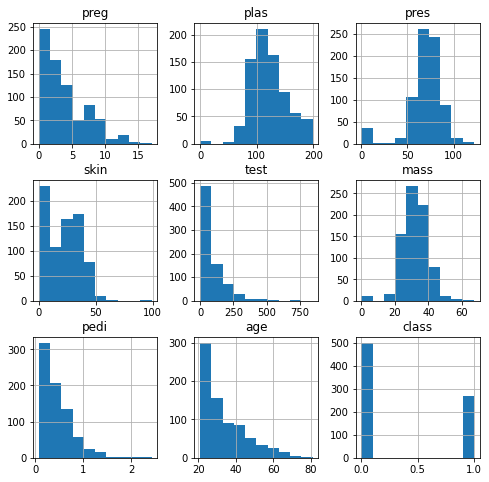

In [ ]:
data.hist(figsize=(8,8))
plt.show()

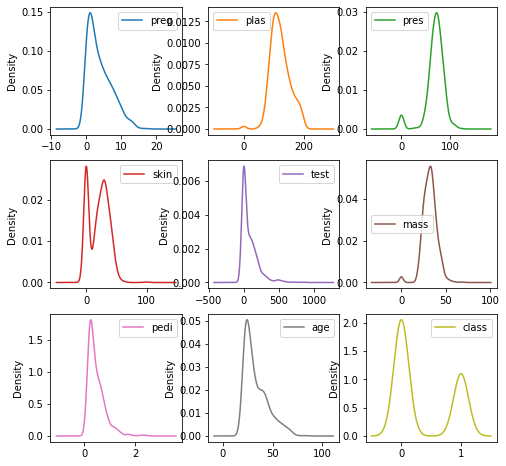

In [ ]:
data.plot(kind='kde',subplots=True, layout=(3,3),sharex=False,figsize=(8,8))
plt.show()

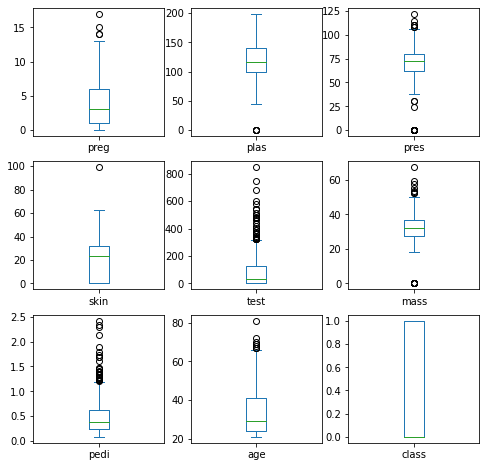

In [ ]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8))
plt.show()

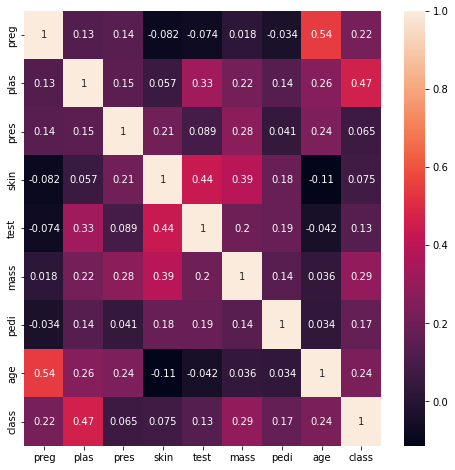

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

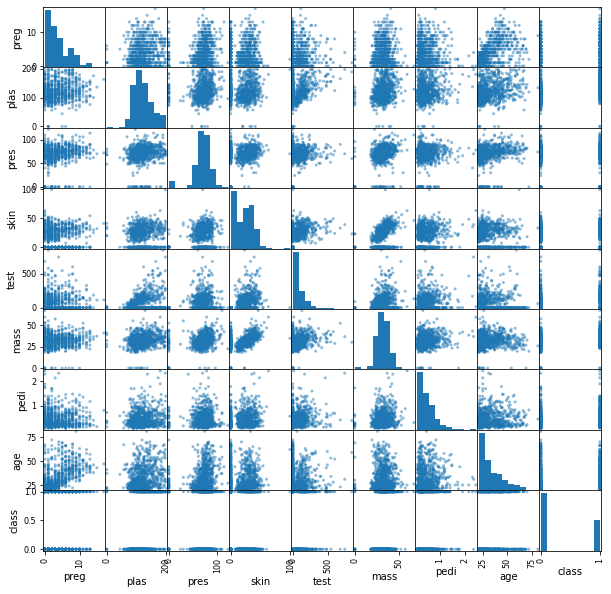

In [ ]:
scatter_matrix(data, figsize=(10,10))
plt.show()

#Задание 2

# **ЗАДАНИЕ 2. ПРОВЕРКА СТАТИСТИЧЕСКИХ ГИПОТЕЗ**

Проведите проверку следующих статистических гипотез: о нормальности распределения, о равенстве средней конкретному значению, о равенстве средних значений, о равенстве медиан, о равенстве дисперсий, о равенстве долей категориального признака, о независимости признаков.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.

**Методика выполнения задания:**

# **Раздел 1. Критерий Шапиро-Уилка. Проверка нормальности распределения численности населения в городах России в 1959 году**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

**1. Укажите путь к рабочей папке, где хранятся данные, с помощью функции chdir() из модуля os.**

**2. Загрузите данные из файла town_1959_2.csv с помощью функции read_csv() из модуля pandas. Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
df=pd.read_csv('town_1959_2.csv',encoding='cp1251')
df=df.set_index('номер')
df.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


**3. Постройте гистограмму для логарифма численности населения городов, воспользовавшись функцией log10 из модуля numpy для логарифмирования и функцией hist() из модуля matplotlib.pyplot. Сделайте предположение о нормальности прологарифмированных**

(array([  1.,   8.,  24., 127., 408., 302.,  88.,  33.,  11.,   2.]),
 array([-1.        , -0.52970528, -0.05941055,  0.41088417,  0.8811789 ,
         1.35147362,  1.82176835,  2.29206307,  2.7623578 ,  3.23265252,
         3.70294725]),
 <a list of 10 Patch objects>)

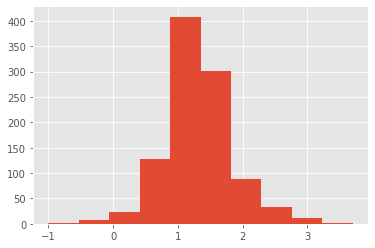

In [ ]:
plt.hist(np.log10(df['население']))
# нормальное распределение (гипотеза [0])

**4. Проведите проверку гипотезы о нормальности распределения прологарифмированных данных на основе критерия Шапиро-Уилка, воспользовавшись функцией shapiro() из модуля scipy.stats. Прокомментируйте результат.**

In [ ]:
res=stats.shapiro(np.log10(df['население']))
print('p-value:',res[1])
# p-value очень малоб очевидно, что значительно меньше 0.05,
# значит отвергаем [0] гипотезу

p-value: 3.1486824866172602e-12


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  2.,  1.,  1.,  2.,  4.,
         7., 10.,  7., 19., 21., 32., 48., 49., 91., 86., 89., 93., 78.,
        78., 63., 42., 41., 21., 23., 16., 16., 12.,  8., 12.,  8.,  4.,
         1.,  7.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([-1.        , -0.90594106, -0.81188211, -0.71782317, -0.62376422,
        -0.52970528, -0.43564633, -0.34158739, -0.24752844, -0.1534695 ,
        -0.05941055,  0.03464839,  0.12870734,  0.22276628,  0.31682523,
         0.41088417,  0.50494312,  0.59900206,  0.69306101,  0.78711995,
         0.8811789 ,  0.97523784,  1.06929679,  1.16335573,  1.25741468,
         1.35147362,  1.44553257,  1.53959151,  1.63365046,  1.7277094 ,
         1.82176835,  1.91582729,  2.00988624,  2.10394518,  2.19800413,
         2.29206307,  2.38612202,  2.48018096,  2.57423991,  2.66829885,
         2.7623578 ,  2.85641674,  2.95047569,  3.04453463,  3.13859358,
         3.23265252,  3.32671147,  3.42077041,  3.51482936,

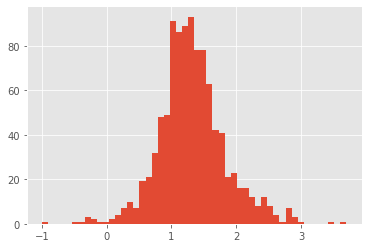

In [ ]:
plt.hist(np.log10(df['население']), bins=50)
# увеличтм дискретность и увидем пенечки (выбросы), что делает
# распределение ненормальным

# **Раздел 2. Критерий Манна-Уитни. Сравнение медиан цен домов в Альбукерке, расположенных на углу и не на углу улицы**

**5. Загрузите данные из файла Albuquerque Home Prices_data.txt с помощью функции read_csv() из модуля pandas. Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
df=pd.read_csv('Albuquerque Home Prices_data.txt',sep='\t')
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


**6. Замените значение -9999, которое здесь употребляется в качестве пустого значения, на корректное пустое значение nan из модуля numpy. Воспользуйтесь при этом функцией replace(). Выведите на экран первые 5 наблюдений преобразованных данных.**

In [ ]:
df=df.replace(-9999,np.nan)
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


**7. Сохраните в отдельные переменные выборки, которые собираетесь сравнивать, а именно в переменную  – цену домов, расположенных на углу улицы (COR = 1), и в переменную  – цену домов, расположенных не на углу улицы (COR = 0).**

**8. Нанесите на одну диаграмму 2 гистограммы для сравниваемых типов домов. Воспользуйтесь при этом функцией hist() и функцией legend() из модуля matplotlib.pyplot. Сделайте вывод о нормальности распределений данных двух выборок.**

In [ ]:
x=df[df['COR']==1]['PRICE']
y=df[df['COR']==0]['PRICE']
x.name, y.name = 'corner', 'not corner'

In [ ]:
def two_histograms(x,y):
  x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
  y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
  plt.axvline(x.mean(),color='red',alpha=0.8,linestyle='dashed') # рисует среднюю линию
  plt.axvline(y.mean(),color='blue',alpha=0.8,linestyle='dashed') # рисует среднюю линию
  plt.legend([x.name, y.name]) # аннотация в верхнем правом углу

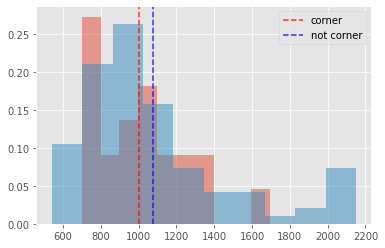

In [ ]:
two_histograms(x,y)
# распределения ненормальные, поэтому среднее сравнивать нельзя, только медиану

**9. Сравните медианы двух выборок на основе критерия Манна-Уитни. Воспользуйтесь при этом функцией mannwhitneyu() из модуля scipy.stats. Прокомментируйте результа**т.

In [ ]:
res=stats.mannwhitneyu(x,y) # [0] гипотеза - медианы равны
print('p-value:',res[1]) # p-value>0.05 поэтому [0] не отвергаем

p-value: 0.40220407862126695


# **Раздел 3. Одновыборочный критерий Стьюдента. Оценка способности к подавлению импульсивных поведенческих реакций**

**10. Загрузите данные из файла ADHD.txt с помощью функции read_csv() из модуля pandas. Дайте названия столбцам, обратившись к атрибуту columns: 'Placebo', 'Methylphenidate'. Здесь 'Placebo' – сведения о пациентах, принимающих плацебо, 'Methylphenidate' – о принимающих лекарство.  Посмотрите на первые 5 наблюдений с помощью функции**

In [ ]:
data=pd.read_csv('ADHD.txt',sep=' ',header=0)
data.columns=['Placebo','Metylphenidate']
data.head()

,Placebo,Metylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


**11. Примените одновыборочный критерий Стьюдента для проверки гипотезы о равенстве 50 способности к подавлению импульсивных поведенческих реакций пациентами, принимающими плацебо. Воспользуйтесь при этом функцией ttest_1samp(data.Placebo, 50.0) из модуля scipy.stats.  Прокомментируйте результат.**

In [ ]:
stats.ttest_1samp(data.Placebo, 50.0)
# pvalue<0.05, значит отвергаем [0]гипотезу о равенстве = 50-ти
# значит людей лечить надо

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

# **Раздел 4. Критерий Стьюдента для независимых выборок. Возраст, в котором умирают европейские аристократы**

**12.Загрузите данные из файла agedeath.dat.txt с помощью функции read_csv() из модуля pandas. Через атрибут names функции read_csv() укажите названия столбцов - 'group', 'age', 'index'. Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
df=pd.read_csv('ADHD.txt',sep=' ',header=0, names=['Placebo','Meli'])
df.head()

,Placebo,Meli
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


**!!! Нужно чтобы данные были нормальными, а дисперсии равны**

**13. Данные содержат информацию о продолжительности жизни следующих классов: суверенитет ('sovr'), аристократия ('aris') и дворянство ('gent'). Сохраните в отдельные переменные выборки, которые собираетесь сравнивать, а именно в переменную  – возраст смерти класса 'sovr', а в переменную  – возраст смерти класса 'aris'.**

**14. Нанесите на одну диаграмму 2 гистограммы для сравниваемых классов. Воспользуйтесь при этом функцией hist() и функцией legend() из модуля matplotlib.pyplot. Сделайте вывод о нормальности распределений данных двух выборок.**

In [ ]:
x=df[df['group']=='sovr']['age']
y=df[df['group']=='aris']['age']
x.name, y.name = 'sovr', 'aris'

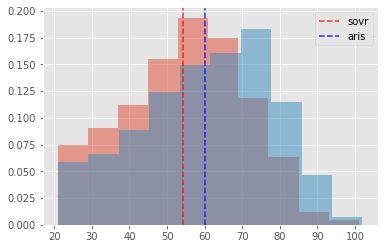

In [ ]:
two_histograms(x,y)

**15. Проверьте гипотезу о равенстве дисперсий на основе критерия Флигнера-Килина. Воспользуйтесь при этом функцией fligner() из модуля scipy.stats. Прокомментируйте результат.**

In [ ]:
stats.fligner(x,y)
# pvalue<0, значит отвергаем [0]гипотезу о равенстве дисперсий
# значит надо пользоваться критерием Умана-Уитна

FlignerResult(statistic=15.114917017895495, pvalue=0.00010116077103844913)

**16. Проверьте гипотезу о равенстве средних значений двух независимых классов на основе критерия Стьюдента для независимых выборок. Воспользуйтесь при этом функцией ttest_ind() из модуля scipy.stats. В параметре equal_var этой функции укажите, равны дисперсии (True) или нет (False), опираясь на результаты проверки из п. 15. Прокомментируйте результат.**

In [ ]:
stats.ttest_ind(x,y,equal_var=False)
# equal_var=False - дает возможность сравнить даже если дисперсии не равны
# [0] - отвергаем, значит средние не равны

Ttest_indResult(statistic=-10.758106583586057, pvalue=1.5181184197728794e-26)

**Раздел 5. Критерий Стьюдента для парных выборок. Скорость чтения названий цветов**

**17. Загрузите данные из файла interference.csv с помощью функции read_csv() из модуля pandas. Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
df=pd.read_csv('interference.csv')
df.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


**18. Данные содержат информацию о скорости чтения названий цветов в зависимости от того, шрифт какого цвета использовался. В столбце 'DiffCol' указана скорость чтения цветного шрифта, а в столбце 'Black' - черно-белого. Сохраните в отдельные переменные выборки, которые собираетесь сравнивать, а именно в переменную  – скорость чтения названий цветов с цветным шрифтом, а в переменную  – скорость чтения названий цветов с черно-белым шрифтом.**

**19. Посмотрите на гистограммы переменных  и . Сделайте вывод о нормальности их распределений и о возможности применения критерия Стьюдента для сравнения средних.**

In [ ]:
x=df['DiffCol']
y=df['Black']
x.name, y.name = 'DiffCol', 'Black'

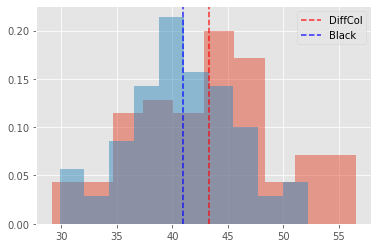

In [ ]:
two_histograms(x,y)

**20. Проверьте гипотезу о равенстве средних значений двух зависимых выборок на основе критерия Стьюдента для зависимых выборок. Воспользуйтесь при этом функцией ttest_rel() из модуля scipy.stats. Прокомментируйте результат.**

In [ ]:
stats.ttest_rel(x,y)
# [0] гипотезу о равенстве скоростей чтения отвергаем, т.е. скорости различаются

Ttest_relResult(statistic=2.463853781331113, pvalue=0.0162416779538072)

In [ ]:
stats.fligner(x,y) # гиротеза о равенстве дисперсий отвергается, т.к. 0.045<0.05

FlignerResult(statistic=3.992070960607846, pvalue=0.0457148434681976)

# **Раздел 6. Критерий хи-квадрат. Популярность кандидата**

**21. В регионе ожидаются выборы. Команда кандидата проводит опрос, в результате которого в поддержку кандидата выказалось 28% из 100 опрошенных в городе и 20% из 100 опрошенных на селе. Нужно выяснить, является ли эта разница статистически значимой, и нужно ли разворачивать дополнительную рекламную кампанию на селе. Проверять гипотезу о равенстве распределений будем с использованием критерия хи-квадрат.**

**22. Сначала постройте таблицу сопряжённости, в которой будут указаны доли высказавшихся за ('for') и против ('against') кандидата в разрезе города ('city') и села ('country'). Воспользуйтесь при этом функцией DataFrame() из модуля pandas. Выведите ее на экран.**

In [ ]:
table=pd.DataFrame([[28,72],[20,80]],index=['city','country'],columns=['for','against'])
table

,for,against
city,28,72
country,20,80


**23. На основе таблицы сопряженности проверьте с помощью критерия хи-квадрат гипотезу о равенстве долей респондентов, высказавшихся за и против кандидата. Воспользуйтесь при этом функцией chi2_contingency() из модуля scipy.stats. Прокомментируйте**

отступление:

**хи квадрат** -критерий согласия
т.е. сравниваем теоритические данные (частота выпадания числа на кубике = 1/6) и фактические выпадания, то же касается распределения, т.е. сравниваем с нормальным распределением

In [ ]:
stats.chi2_contingency(table)
# pvalue - 0.2464

(1.3432017543859647, 0.2464701206916715, 1, array([[24., 76.],
        [24., 76.]]))

# **Раздел 7. Коэффициент корреляции Пирсона. Взаимосвязь цены и площади домов в Альбукерке**

**24. Загрузите данные из файла Albuquerque Home Prices_data.txt с помощью функции read_csv() из модуля pandas. Замените значение -9999, которое здесь употребляется в качестве пустого значения, на корректное пустое значение nan из модуля numpy. Воспользуйтесь при этом функцией replace(). Выведите на экран первые 5 наблюдений преобразованных данных.**

In [ ]:
df=pd.read_csv('Albuquerque Home Prices_data.txt',sep='\t')
df=df.replace(-9999,np.nan)
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


**25. Проверьте очевидный факт, что площадь дома коррелирует с его ценой. Постройте диаграмму рассеяния для переменных цена ('PRICE') и площадь дома ('SQFT'). Воспользуйтесь при этом функцией scatter() из модуля matplotlib.pyplot. Прокомментируйте полученный результат.**

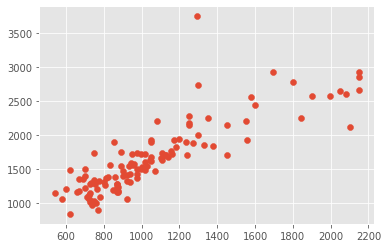

In [ ]:
plt.scatter(df['PRICE'],df['SQFT'])

**26. Проверьте свою гипотезу аналитически с помощью коэффициента корреляции Пирсона. Воспользуйтесь при этом функцией pearsonr() из модуля scipy.stats. Прокомментируйте результат.**

In [ ]:
stats.pearsonr(df['PRICE'],df['SQFT'])
# уровень корреляции = 0.84479 - очень высокий, т.е. цена зависит от площади
# [0] гипотезу о независимости цены и площади отвергаем, pvalue очень мал

(0.8447950985552124, 5.146345707629025e-33)